## 引入相关库

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
plt.rcParams['font.sans-serif'] = ['SimHei']

## EDA

In [4]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_a.csv')

In [5]:
train.shape

(41440, 51)

In [6]:
test.shape

(2469, 50)

In [7]:
train.head()

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,RG00001,BK00064,1953,0,7,36,0,28,1,1,12,15,16,76,5,3,22,355584000,7411.98,47974.22551,111,810967373,7755,104573.48460,25,264,0,0,0.0,0,0.0,0,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,RG00002,BK00049,2007,0,2,184,0,26,0,1,27,5,16,163,6,4,51,5000000,122.83,40706.66775,2,9668955,286,33807.53497,2,4,0,0,0.0,0,0.0,0,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,RG00002,BK00050,暂无信息,3,6,60,1,43,2,3,24,35,37,85,6,4,30,1687284798,49071.30,34384.35089,555,344894466,3143,109734.16040,11,159,126,0,0.0,0,0.0,0,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,RG00002,BK00051,暂无信息,0,3,364,2,60,1,8,83,30,47,358,3,1,131,468272888,22809.70,20529.55050,260,196307819,6418,30587.07058,58,730,0,1,108037.8,1,108037.8,332760000,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,RG00003,BK00044,暂无信息,1,0,141,0,15,0,0,21,5,10,100,5,2,34,108851470,4463.62,24386.36577,38,286722058,5608,51127.32846,34,851,216,0,0.0,0,0.0,0,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0


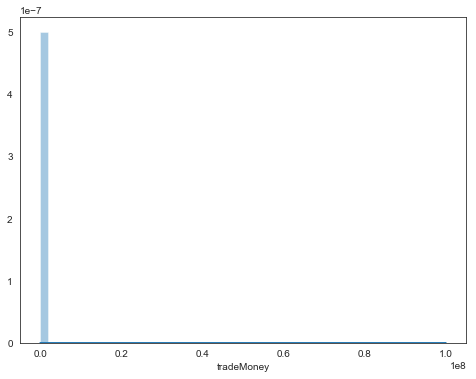

In [8]:
# 查看目标变量分布
sns.set_style('white')
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train['tradeMoney'])

In [9]:
# 分析筛选目标变量阈值大小
num = len(train.index)

for i in range(1, 10):
    s = i*10000
    print('{:<6}: {:.5f}'.format(s, len(train[train['tradeMoney'] < s]) / num))

10000 : 0.93316
20000 : 0.98625
30000 : 0.99534
40000 : 0.99771
50000 : 0.99831
60000 : 0.99889
70000 : 0.99908
80000 : 0.99930
90000 : 0.99944


In [10]:
# 筛选数据，比较好观察分布
train = train[train['tradeMoney'] < 40000]

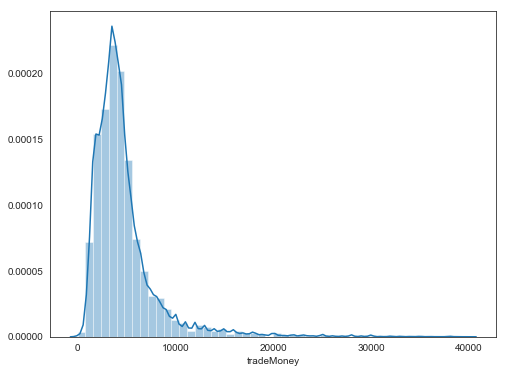

In [23]:
# 查看目标变量分布
sns.set_style('white')
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train['tradeMoney'])

In [11]:
# 查看偏度和峰度
print("Skewness: %f" % train['tradeMoney'].skew())
print("Kurtosis: %f" % train['tradeMoney'].kurt())

Skewness: 3.401020
Kurtosis: 17.474990


In [12]:
# 区分稠密特征和稀疏特征
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
all_feature = train.columns
drop_feature = ['ID', 'tradeMoney']
dense_feature = []
sparse_feature = []

for i in train.columns:
    if i not in drop_feature:
        if train[i].dtype in numeric_dtypes:
            dense_feature.append(i)
        else:
            sparse_feature.append(i)

print('Dense feature number of %s' % len(dense_feature))
print('Sparse feature number of %s' % len(sparse_feature))

Dense feature number of 38
Sparse feature number of 11


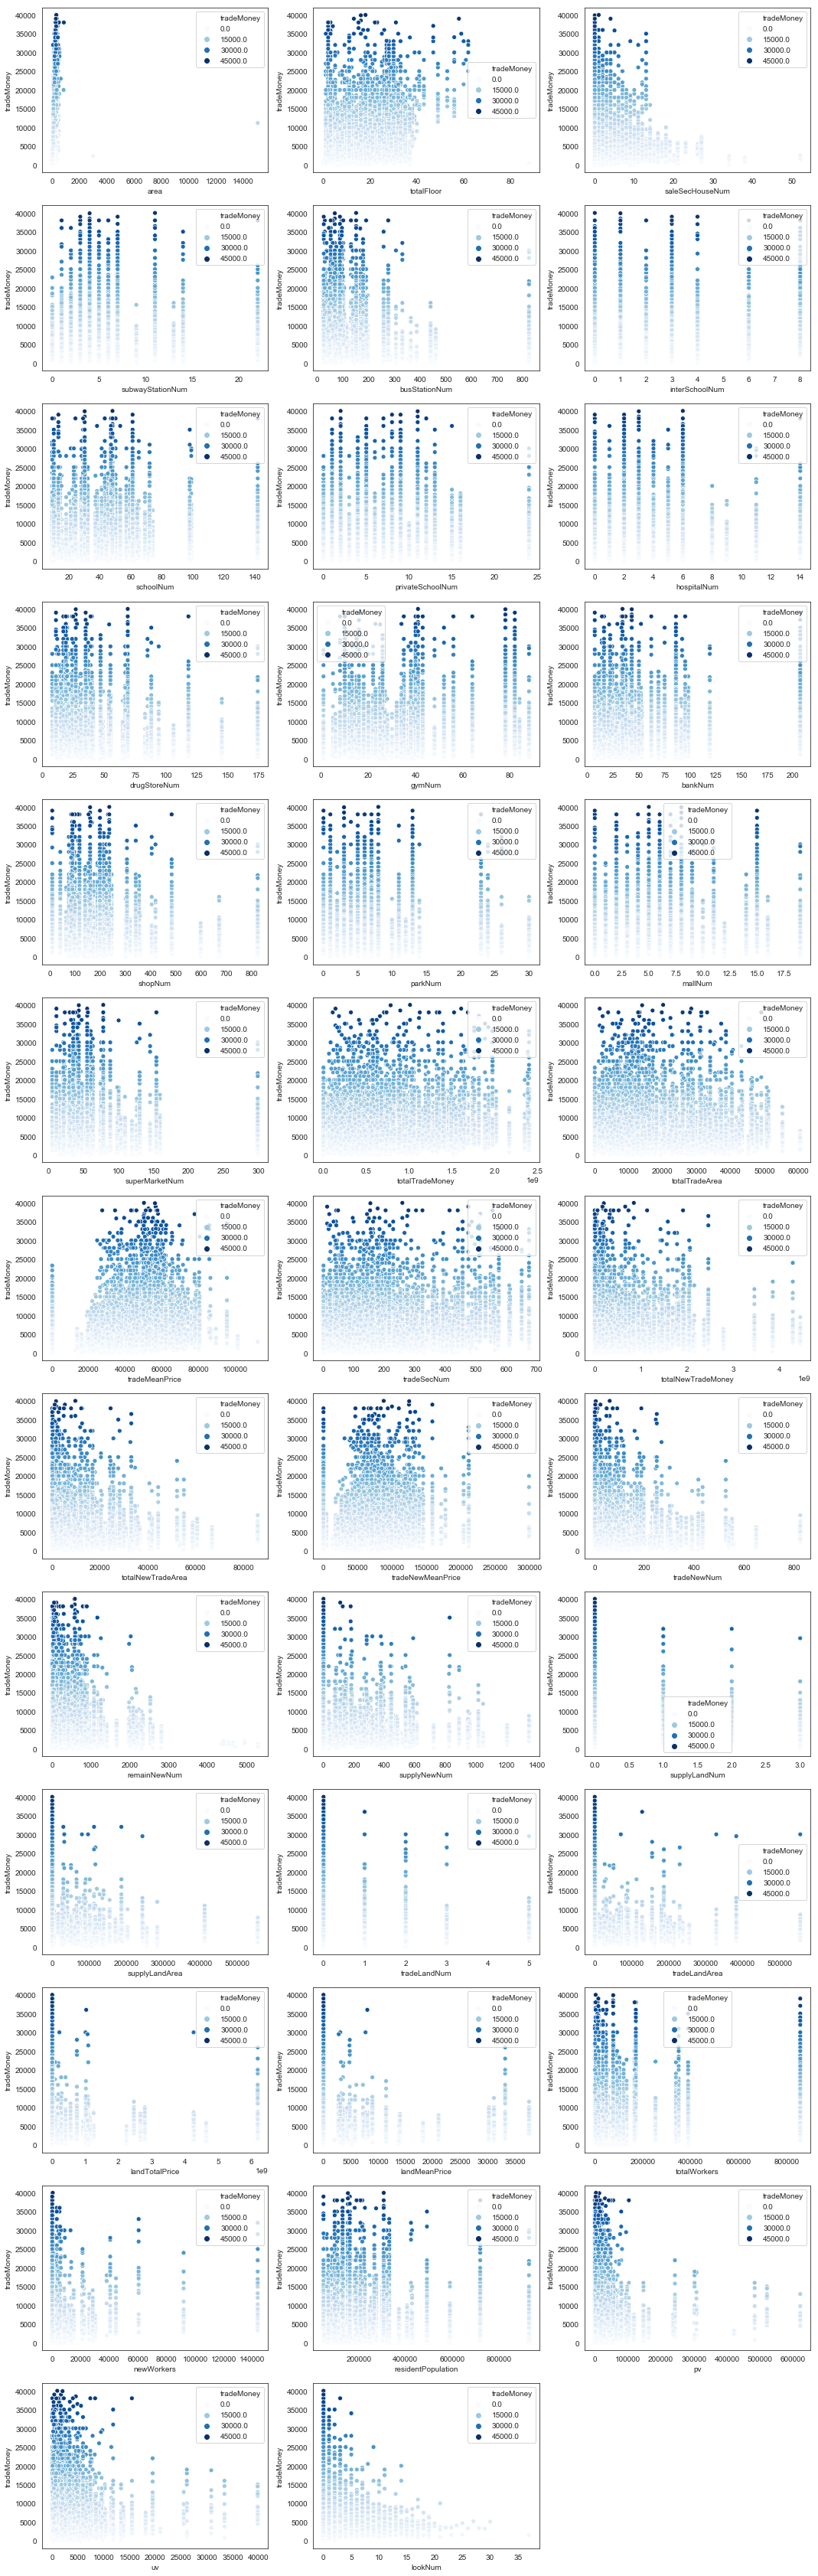

In [13]:
# 绘制稠密特征跟目标变量的散点图
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(18, 180))

for i, feature in enumerate(dense_feature, 1):
    plt.subplot(len(dense_feature), 3, i)
    sns.scatterplot(x=feature, y='tradeMoney', hue='tradeMoney', palette='Blues', data=train)

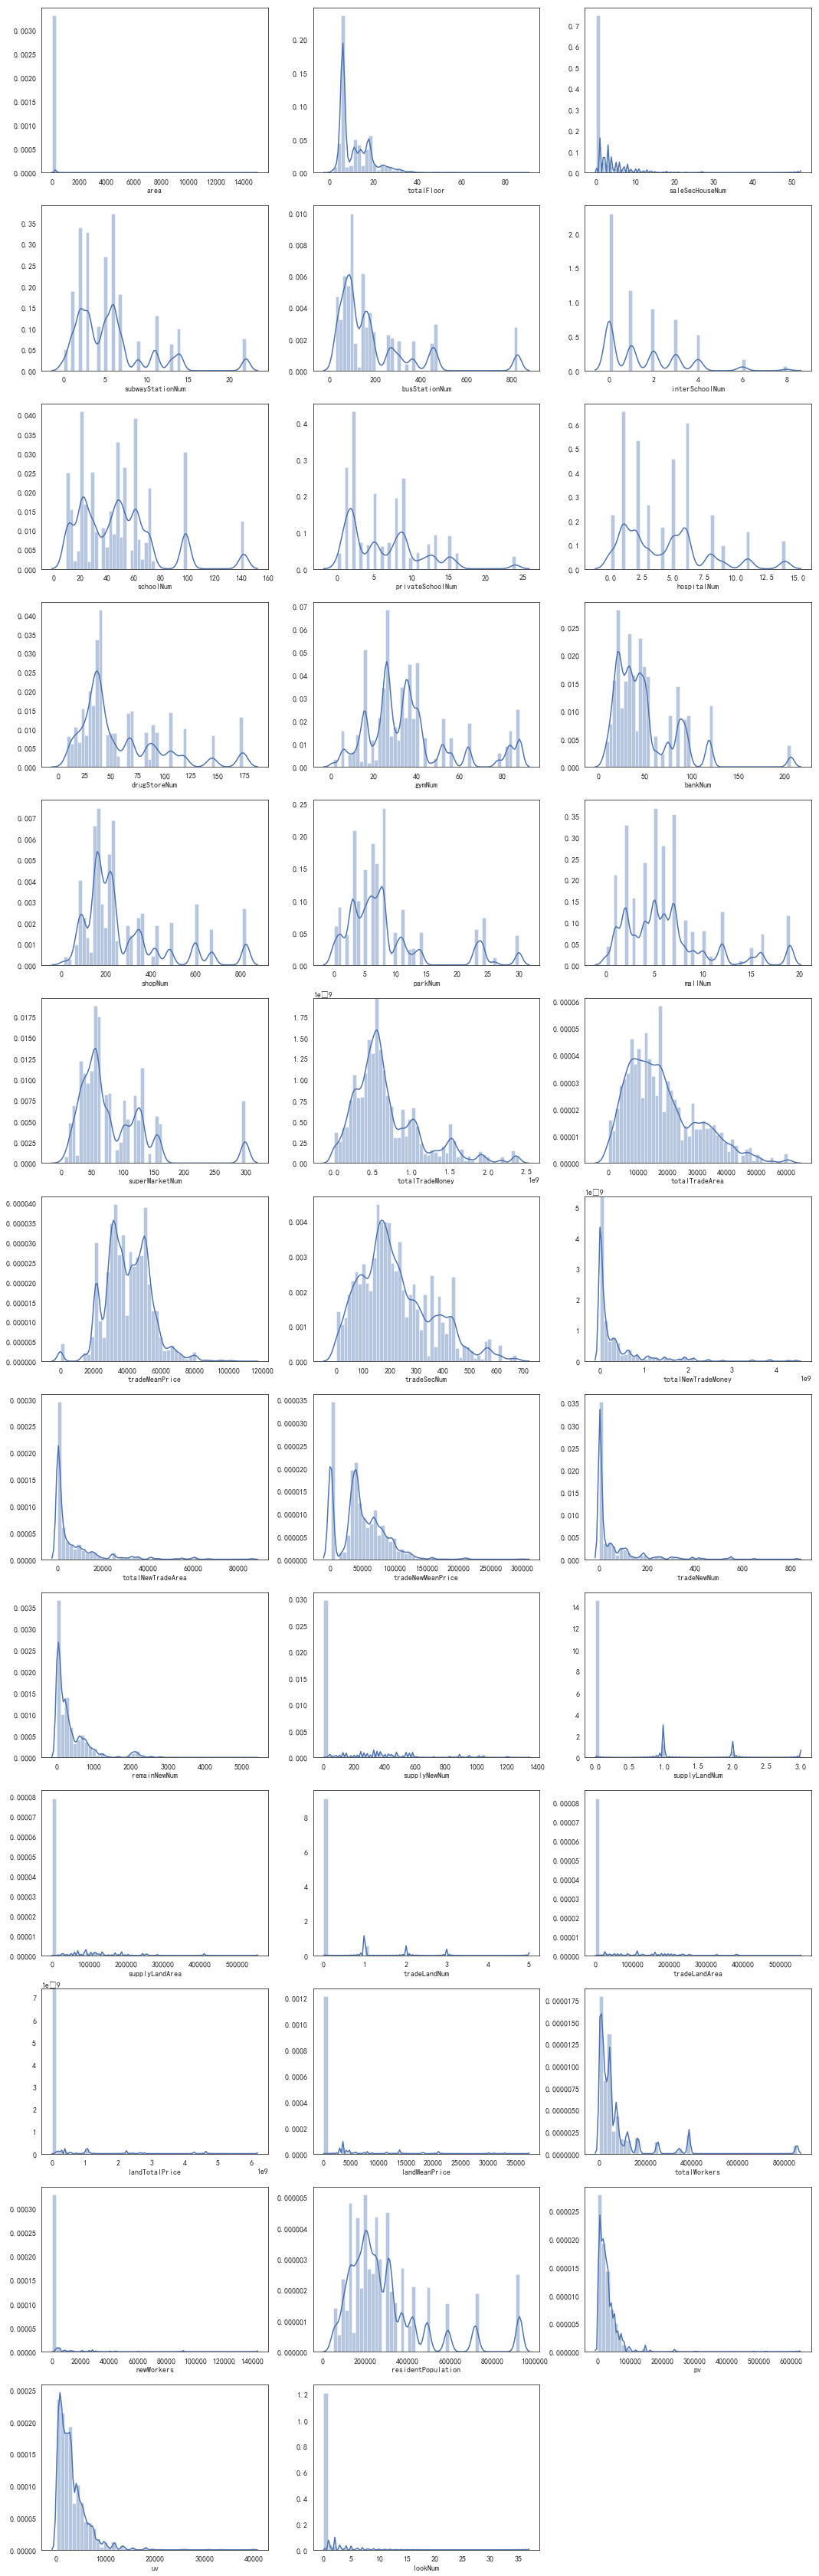

In [21]:
# 绘制稠密特征分布图
# sns.set_style('white')
sns.set_color_codes(palette='deep')
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(18, 180))

for i, feature in enumerate(dense_feature, 1):
    plt.subplot(len(dense_feature), 3, i)
    sns.distplot(train[train[feature].notnull()][feature], color='b')

In [15]:
# 查看稀疏特征
train[sparse_feature].head()

,rentType,houseType,houseFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,tradeTime
0,未知方式,2室1厅1卫,低,暂无数据,其他,XQ00051,SH,RG00001,BK00064,1953,2018/11/28
1,未知方式,3室2厅2卫,中,暂无数据,简装,XQ00130,SH,RG00002,BK00049,2007,2018/12/16
2,未知方式,3室2厅2卫,低,暂无数据,其他,XQ00179,SH,RG00002,BK00050,暂无信息,2018/12/22
3,未知方式,1室1厅1卫,中,暂无数据,精装,XQ00313,SH,RG00002,BK00051,暂无信息,2018/12/21
4,未知方式,3室2厅3卫,低,暂无数据,毛坯,XQ01257,SH,RG00003,BK00044,暂无信息,2018/11/18


In [16]:
# 分析系数特征的除重值个数
for i in sparse_feature:
    print("{:<16}: {:>6}".format(i, train[i].nunique()))

rentType        :      4
houseType       :     99
houseFloor      :      3
houseToward     :     10
houseDecoration :      4
communityName   :   4210
city            :      1
region          :     15
plate           :     66
buildYear       :     80
tradeTime       :    361


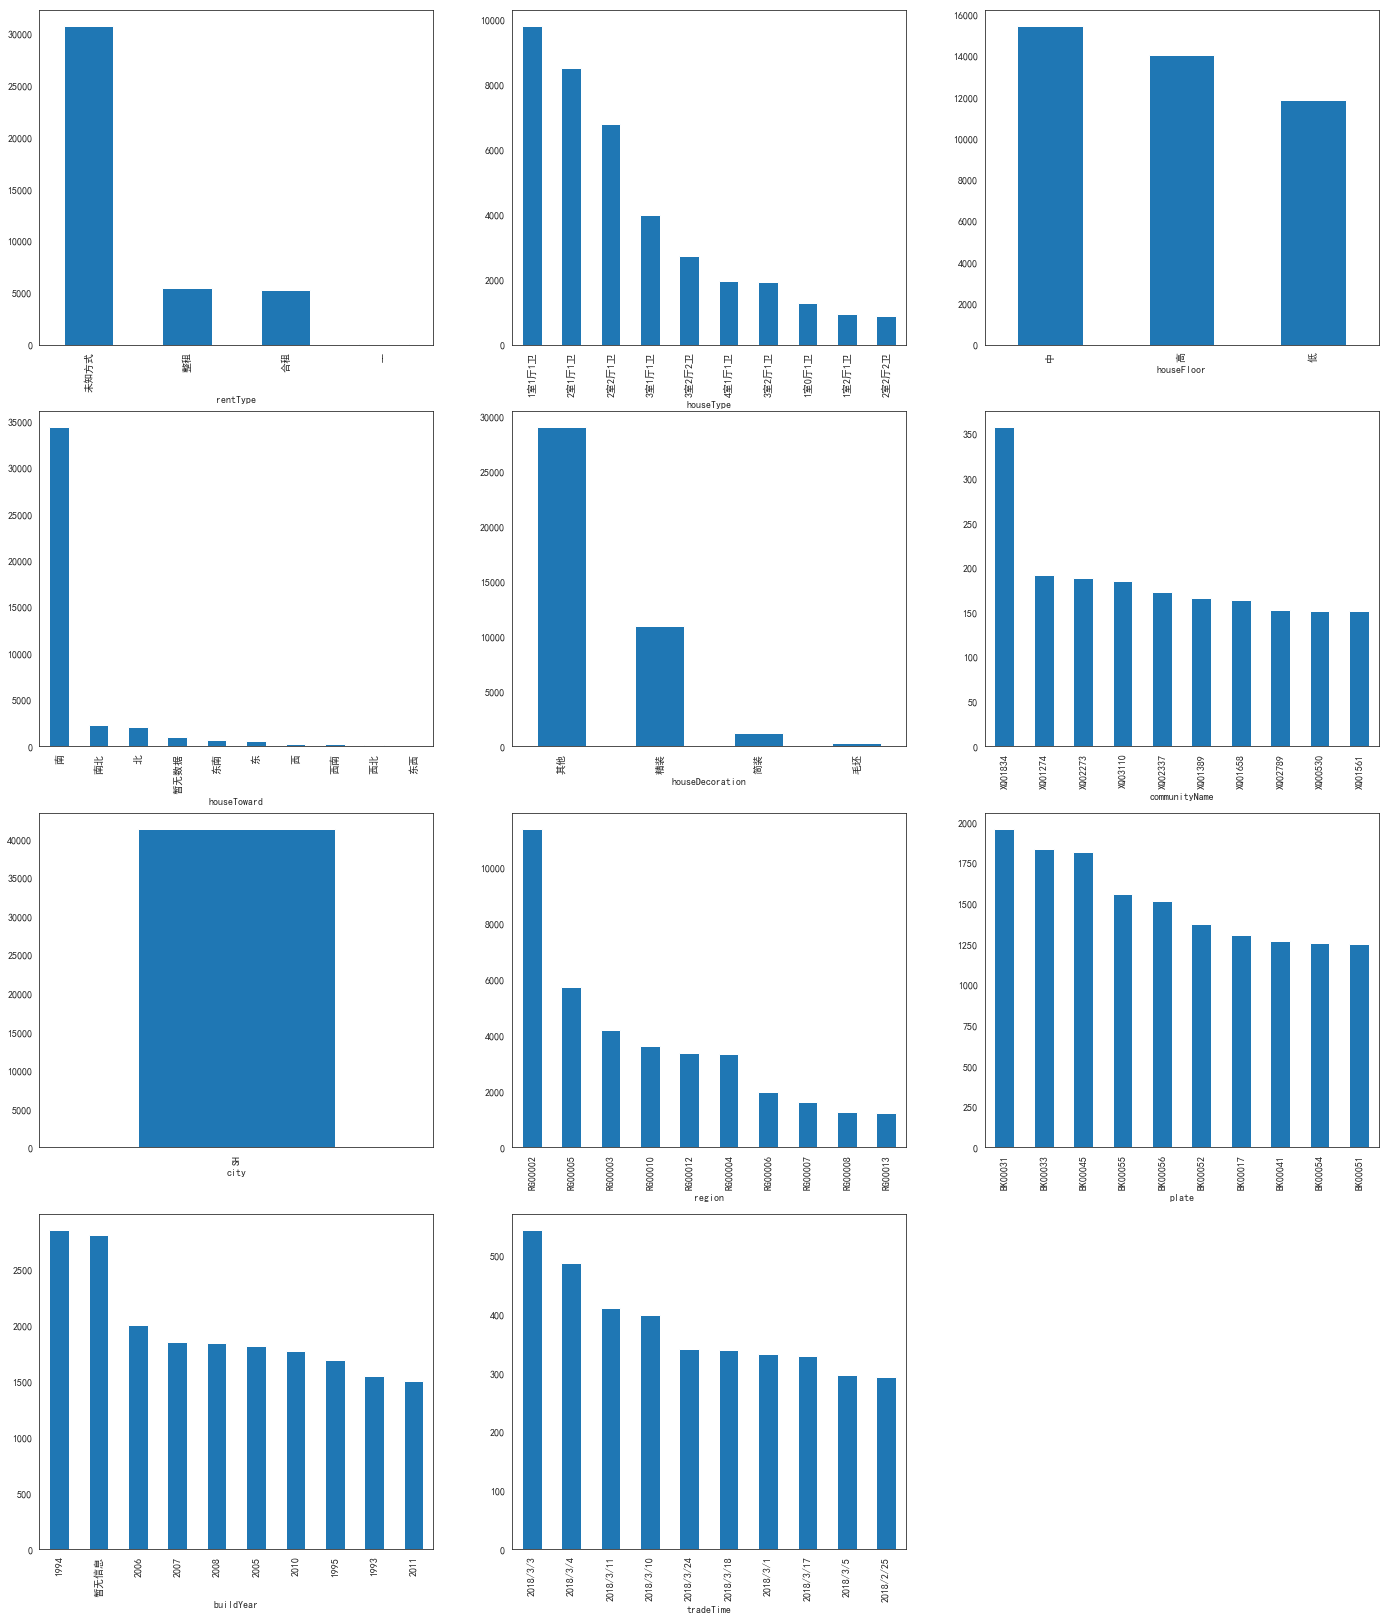

In [22]:
# 绘制稀疏特征分布图，只取最多的10个
f, ax = plt.subplots(ncols=3, nrows=0, figsize=(24, 80))

for i, feature in enumerate(sparse_feature, 1):
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.subplot(len(sparse_feature), 3, i)
    train[feature].value_counts()[:10].plot.bar()
    plt.xlabel(feature)

In [18]:
# 计算缺失值百分比
def percent_missing(df):
    dict_percent = {}
    cols = df.columns
    for i in cols:
        dict_percent.update({i:round(df[i].isnull().mean()*100, 2)})
    return sorted(dict_percent.items(), key=lambda x: x[1], reverse=True)[0:10]

In [19]:
percent_missing(train)

[('pv', 0.04),
 ('uv', 0.04),
 ('ID', 0.0),
 ('area', 0.0),
 ('rentType', 0.0),
 ('houseType', 0.0),
 ('houseFloor', 0.0),
 ('totalFloor', 0.0),
 ('houseToward', 0.0),
 ('houseDecoration', 0.0)]